# **Анализ продаж британского e-commerce** (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели объёмов продаж)

Ссылка на датасет [**E-Commerce Data**](https://www.kaggle.com/datasets/carrie1/ecommerce-data)



---



### **ЗАГРУЗКА ДАТАСЕТА**

In [ ]:
# скачиваем архив датасета с гугл диска, где он предварительно загружен и расшарен, это все сделано чисто для удобства
! gdown --id 1twBZCO1rqoEHKY2-1JkKMNh84dNHSCPW

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1twBZCO1rqoEHKY2-1JkKMNh84dNHSCPW
To: /content/e_commerce_data.zip
100% 7.55M/7.55M [00:00<00:00, 19.2MB/s]


In [ ]:
# разархивирываем датасет
! unzip /content/e_commerce_data.zip

Archive:  /content/e_commerce_data.zip
  inflating: data.csv                


In [ ]:
# импортируем библиотеки, которые будем использовать
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import math

# подгружаем библиотеки для построения модели
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

In [ ]:
df = pd.read_csv('data.csv', sep = ',', encoding = 'unicode_escape')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# смотрим предварительную информацию по датасету, название полей, их тип и количество null значений
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Описание полей датасета:

1.	**InvoiceNo** -	Номер счета
2.	**StockCode** -	Код акции
3.	**Description** -	Наименование товара
4.	**Quantity** - Количество товара
5.	**InvoiceDate** -	Дата совершения покупки
6.	**UnitPrice** -	Цена товара за штуку
7.	**CustomerID** - ID пользователя совершившего покупку товара
8.	**Country** -	Страна совершения покупки

### **ПРЕДОБРАБОТКА**

In [ ]:
# смотрим количество записей и строк
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(541909, 8)

In [ ]:
# удаляем дубликаты и смотрим сколько по итогу получилось записей
df.drop_duplicates(inplace = True)
df.shape

(536641, 8)

In [ ]:
# смотрим колчиество пропусков в процентах
missing_percentage_before = df.isnull().sum() / df.shape[0] * 100
missing_percentage_before

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64

In [ ]:
# заменяем пустоты на Unknown, чтобы не искажать общие показатели
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# удаляем строки с пустотами в поле Description, т.к. определить чем его заполнить непредставляется возможным
df.dropna(subset = ['Description'], inplace = True)

In [ ]:
# проверяем, что пропущенных значений больше нет
missing_percentage_after = df.isnull().sum() / df.shape[0] * 100
missing_percentage_after

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [ ]:
# создаем новое поле суммы товаров (SumSales)
df['SumSales'] = df['Quantity'] * df['UnitPrice']
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [ ]:
# конвертируем столбец InvoiceDate в формат даты и создаем еще один столбец даты без времени
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DateInvoice'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%dT')
df['DateInvoice'] = df['DateInvoice'].dt.floor('D')

# создаем столбец с годом
df['Year'] = df['InvoiceDate'].dt.year
# создаем столбец с месяцем
df['MonthNum'] = df['InvoiceDate'].dt.month
# создаем столбец с днем недели
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
# создаем столбец с месяцем
df['Month'] = df['InvoiceDate'].dt.month_name()
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumSales,DateInvoice,Year,MonthNum,DayOfWeek,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,2011,12,Friday,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,2011,12,Friday,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,12,Friday,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,12,Friday,December


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  object        
 7   Country      535187 non-null  object        
 8   SumSales     535187 non-null  float64       
 9   DateInvoice  535187 non-null  datetime64[ns]
 10  Year         535187 non-null  int64         
 11  MonthNum     535187 non-null  int64         
 12  DayOfWeek    535187 non-null  object        
 13  Month        535187 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(7)
memory usage: 61.2+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# смотрим записи с отрицательной или нулевой стоимостью за единицу товара (UnitPrice)
df.loc[df['UnitPrice'] <= 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumSales,DateInvoice,Year,MonthNum,DayOfWeek,Month
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,Unknown,United Kingdom,0.0,2010-12-03,2010,12,Friday,December
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,Unknown,United Kingdom,0.0,2010-12-03,2010,12,Friday,December
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,Unknown,United Kingdom,-0.0,2010-12-03,2010,12,Friday,December
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0,2010-12-05,2010,12,Sunday,December
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,Unknown,United Kingdom,-0.0,2010-12-06,2010,12,Monday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,Unknown,United Kingdom,-0.0,2011-12-07,2011,12,Wednesday,December
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,Unknown,United Kingdom,-0.0,2011-12-08,2011,12,Thursday,December
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,Unknown,United Kingdom,0.0,2011-12-08,2011,12,Thursday,December
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,Unknown,United Kingdom,0.0,2011-12-08,2011,12,Thursday,December


In [ ]:
# смотрим записи с отрицательным или нулевым количеством товара (Quantity)
df.loc[df['Quantity'] <= 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumSales,DateInvoice,Year,MonthNum,DayOfWeek,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010-12-01,2010,12,Wednesday,December
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010-12-01,2010,12,Wednesday,December
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010-12-01,2010,12,Wednesday,December
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12-01,2010,12,Wednesday,December
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12-01,2010,12,Wednesday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011-12-09,2011,12,Friday,December
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011-12-09,2011,12,Friday,December
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011-12-09,2011,12,Friday,December
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011-12-09,2011,12,Friday,December


In [ ]:
# удаляем записи с отрицаетльными значениями цены (SumSales) и количества товара (Quantity)
# из описания датасета было не очевидно, что отрицательные значения количества товаров это был возврат товара,
# поэтому возврат товара в данном анализе я опущу, но это останется как точка поиска инсайтов
df = df.drop(df.loc[df['UnitPrice'] <= 0].index)
df = df.drop(df.loc[df['Quantity'] <= 0].index)

# избавляемся от отмененных продаж
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumSales,DateInvoice,Year,MonthNum,DayOfWeek,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,Wednesday,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,Wednesday,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,2011,12,Friday,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,2011,12,Friday,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,12,Friday,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,12,Friday,December


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumSales,DateInvoice,Year,MonthNum,DayOfWeek,Month,PurchaseTime,PurchasePeriod,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30,2010-12-01,2010,12,Wednesday,December,08:26:00,Morning,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December,08:26:00,Morning,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00,2010-12-01,2010,12,Wednesday,December,08:26:00,Morning,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December,08:26:00,Morning,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,2010-12-01,2010,12,Wednesday,December,08:26:00,Morning,2010-12


## **АНАЛИЗ ДАННЫХ**

### ДИНАМИКА ОБЩИХ ПРОДАЖ

In [ ]:
# убираю из датафрейма данные за декабрь 2010, т.к. это 2010 год и он не показателен для меня.
# Также убираю данные за декабрь 2011, т.к. он не полный, если его оставить будут неточный график.
df_grouped = df.groupby(['Year', 'MonthNum']).sum().reset_index()
df_grouped.drop(index = df_grouped.index [0], axis = 0 , inplace = True )
df_grouped.drop(index = df_grouped.index [11], axis = 0 , inplace = True )
df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-eff23cc91882>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['Year', 'MonthNum']).sum().reset_index()


,Year,MonthNum,Quantity,UnitPrice,SumSales
1,2011,1,387099,128987.150,689811.610
2,2011,2,282934,107600.480,522545.560
3,2011,3,376599,144929.080,716215.260
4,2011,4,307953,115129.081,536968.491
5,2011,5,395001,149789.680,769296.610
6,2011,6,388511,139565.420,760547.010
7,2011,7,399693,142528.261,718076.121
8,2011,8,421020,137903.100,757841.380
9,2011,9,569573,173874.922,1056435.192
10,2011,10,621029,221646.600,1151263.730


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


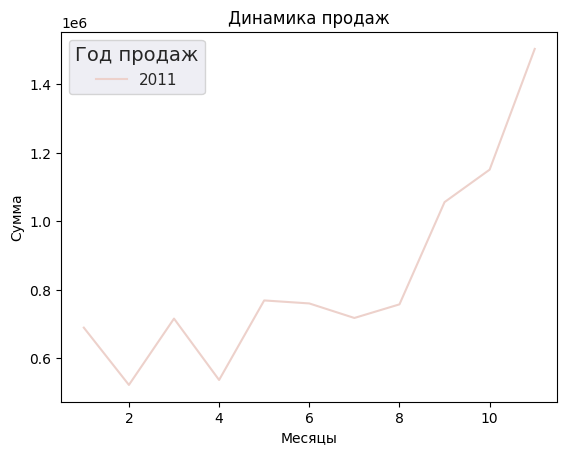

In [ ]:
graf = sns.lineplot(x = 'MonthNum', y = 'SumSales', hue = 'Year', data = df_grouped)

# выставляем размер сетки
sns.set(rc={"figure.figsize":(10 , 7)})

# подписываем оси и название графика
plt.title('Динамика продаж')
plt.xlabel('Месяцы')
plt.ylabel('Сумма')
plt.legend(
    title='Год продаж',
    title_fontsize='14')

# стилизуем график
sns.set_style("whitegrid")
sns.set_context("notebook")

# отображаем график
plt.show()

#### **Вывод:**

На графике видно, что продажи растут месяц к месяцу с периодическими спадами.



---



### АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРОДАЖ ПО ПЕРИОДУ ВРЕМЕНИ

In [ ]:
# создать новый столбец 'PurchaseTime' с информацией о времени покупки
df['PurchaseTime'] = df['InvoiceDate'].dt.time

# создать новый столбец 'PurchasePeriod' с информацией о периоде покупки
df['PurchasePeriod'] = pd.cut(df['InvoiceDate'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

df_period = df.groupby(['PurchasePeriod']).count().reset_index()
df_period

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PurchasePeriod,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SumSales,DateInvoice,Year,MonthNum,DayOfWeek,Month,PurchaseTime
0,Night,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Morning,221863,221863,221863,221863,221863,221863,221863,221863,221863,221863,221863,221863,221863,221863,221863
2,Afternoon,298809,298809,298809,298809,298809,298809,298809,298809,298809,298809,298809,298809,298809,298809,298809
3,Evening,4205,4205,4205,4205,4205,4205,4205,4205,4205,4205,4205,4205,4205,4205,4205


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


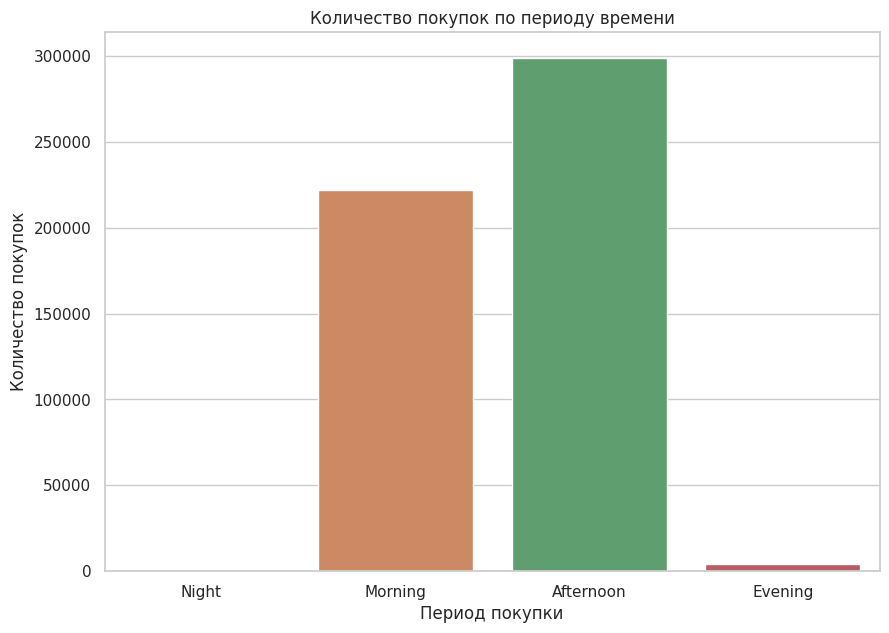

In [ ]:
# строим график
sns.barplot(x='PurchasePeriod', y='InvoiceNo', data=df_period)

plt.title('Количество покупок по периоду времени')
plt.xlabel('Период покупки')
plt.ylabel('Количество покупок')
plt.show()

#### **Вывод:**

Из данного графика видим, что чаще всего люди совершают покупки после полудня (Afternoon) и утром (Morning).

### АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРОДАЖ ПО МЕСЯЦАМ

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


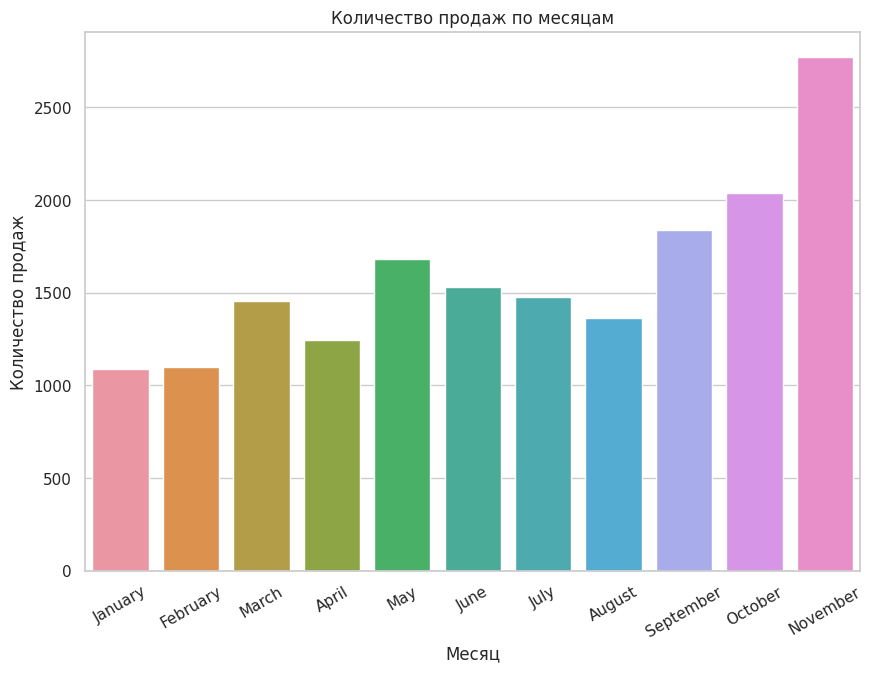

In [ ]:
# группируем данные по месяцам и считаем количество заказов
orders_by_month = df.groupby('Month')['InvoiceNo'].nunique().reset_index()

# удаляем месяц Декабрь(December), т.к. он неполный в датасете
orders_by_month = orders_by_month.drop(orders_by_month[orders_by_month['Month'] == 'December'].index)

# создаем список месяцев в правильном порядке
month_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

# преобразуем столбец с месяцами в категориальный тип данных
orders_by_month['Month'] = pd.Categorical(orders_by_month['Month'], categories = month_year, ordered = True)

# строим график
ax = sns.barplot(x='Month', y='InvoiceNo', data=orders_by_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Количество продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.show()

#### Вывод:
На графике видим, что продажи проходят волнами, сперва в Марте (March), потом в Мае (May) и затем с максимальным пиком в Ноябре(November), возможно это связанно с сезонными продажами каких то товаров.



---



### АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРОДАЖ ПО ДНЯМ НЕДЕЛИ

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


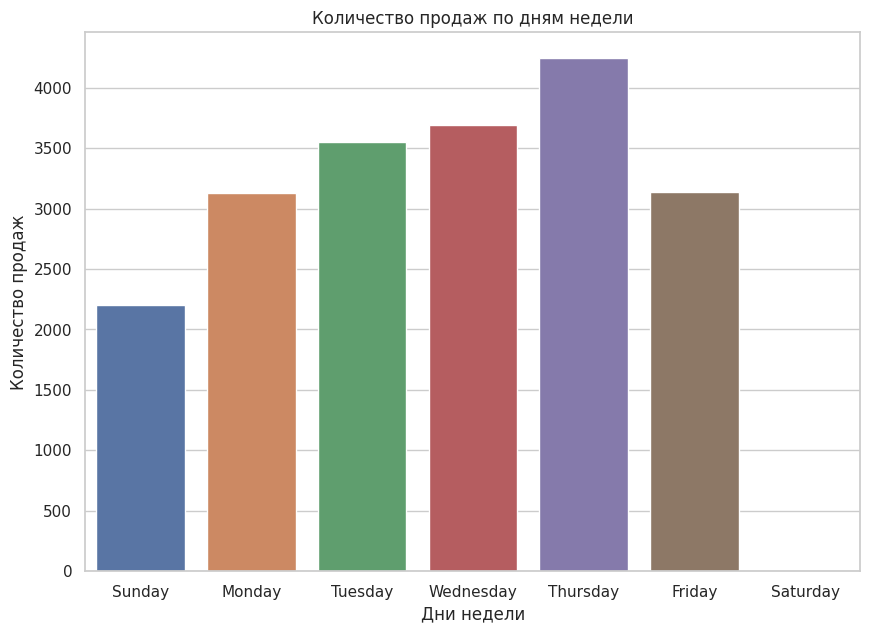

In [ ]:
# группируем данные по дням недели и считаем количество заказов
orders_by_day = df.groupby('DayOfWeek')['InvoiceNo'].nunique().reset_index()

# создаем список дней недели в правильном порядке
week_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# преобразуем столбец с днями недели в категориальный тип данных
orders_by_day['DayOfWeek'] = pd.Categorical(orders_by_day['DayOfWeek'], categories = week_days, ordered = True)

# строим график
sns.barplot(x='DayOfWeek', y='InvoiceNo', data=orders_by_day)
plt.title('Количество продаж по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Количество продаж')
plt.show()

#### Вывод:
Видим, что **Четверг (Thursday)** самый активный день по продажам. Причем, нарастание идет с **Понедельника (Monday)**, **Четверг (Thursday)** - пик и потом спад. Примечательно, что в **Субботу (Saturday)** продаж нет.



---



### АНАЛИЗ ПРОДАЖ ПО СТРАНАМ С РАЗБИВКОЙ НА ДАТАСЕТЫ С United Kingdom И БЕЗ United Kingdom

это сделано для более детализированного анализа датасета

Так как United Kingdom (UK), по продажам, во много раз превышает продажи других стран, я принял решение разбить датасет на 2 части, в первом датасете будут все страны, кроме UK, во втором будет только UK.

СПЕРВА ПРОАНАЛИЗИРУЕМ ДАТАСЕТ БЕЗ UK (United Kingdom)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Страны')

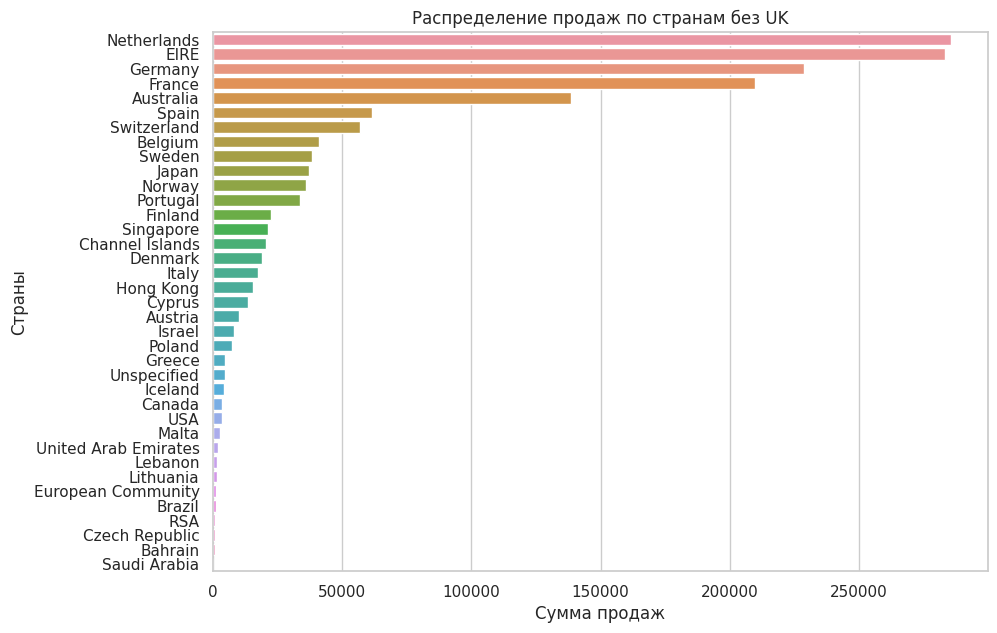

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
# создаем новый датасет удаляя UK
df_without_uk = df.drop(df.loc[df['Country'] == 'United Kingdom'].index).reset_index()

# группируем страны и суммируем продажи
df_top_country = df_without_uk.groupby('Country')["SumSales"].sum().sort_values(ascending = False).reset_index()

# строим график
sns.barplot(x = df_top_country['SumSales'], y = df_top_country['Country']);

# прописываем название графика и подписи осей
plt.title('Распределение продаж по странам без UK')
plt.xlabel('Сумма продаж')
plt.ylabel('Страны')

#### Вывод к графику Распределение продаж по странам без UK:

Из данного графика видно, что самыми активными по продажам страны являются некоторые регионы Западной Европы и Австралия.



---



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Страны')

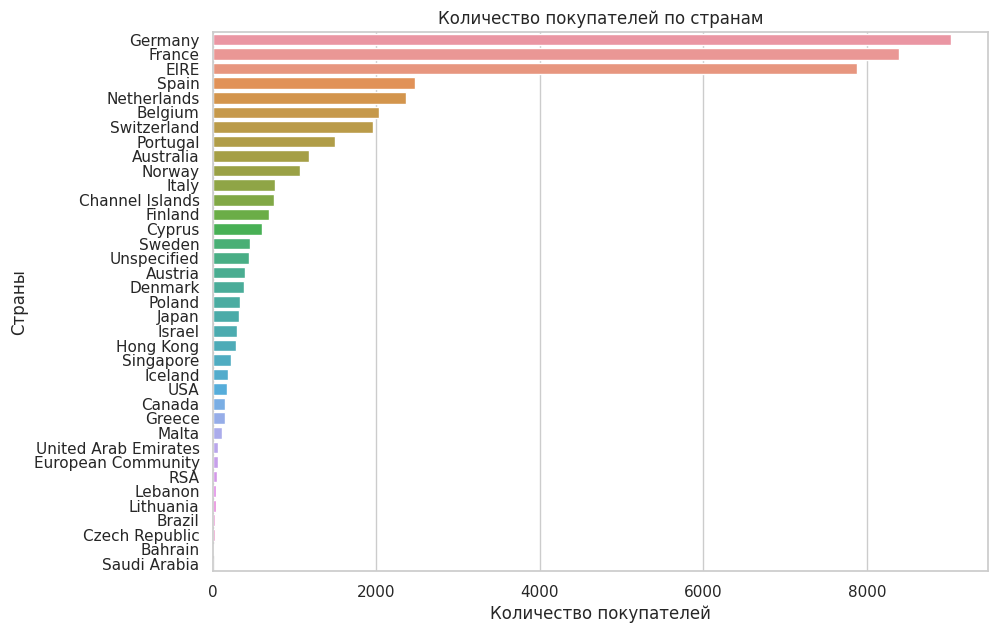

In [ ]:
# смотрим количество покупателей по странам
df_customer_country_without_uk = df_without_uk.groupby('Country')['CustomerID'].count().sort_values(ascending = False).reset_index()

# строим график
sns.barplot(x = df_customer_country_without_uk['CustomerID'], y = df_customer_country_without_uk['Country']);

# прописываем название графика и подписи осей
plt.title('Количество покупателей по странам')
plt.xlabel('Количество покупателей')
plt.ylabel('Страны')

#### Вывод к графику Количество покупателей по странам:

В данном графике можно выделить 3 страны с самым большим количеством покупателей это Германия, Франция и Ирландия.



---



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Товары')

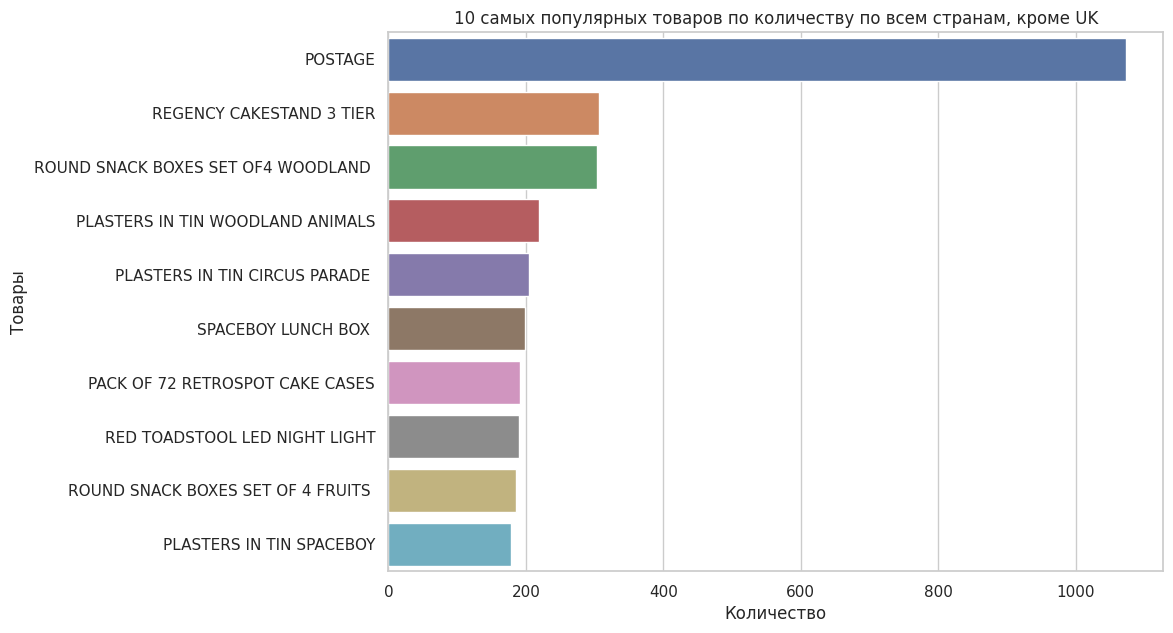

In [ ]:
# смотрим самые популярные товары по странам

# группируем товары и считаем количество продаж
df_description_country_without_uk = df_without_uk.groupby('Description')['Quantity'].count().sort_values(ascending = False).reset_index()
df_description_country_without_uk = df_description_country_without_uk.head(10)

# строим график
sns.barplot(x = df_description_country_without_uk['Quantity'], y = df_description_country_without_uk['Description']);

# прописываем название графика и подписи осей
plt.title('10 самых популярных товаров по количеству по всем странам, кроме UK')
plt.xlabel('Количество')
plt.ylabel('Товары')

#### Вывод к графику 10 самых популярных товаров по количеству по всем странам, кроме UK:
Из данного графика видно, что больше всего расходов уходит на почтовые пересылки



---



ДАЛЕЕ АНАЛИЗИРУЕМ ДАТАСЕТ ТОЛЬКО ПО UK (United Kingdom)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Название товаров')

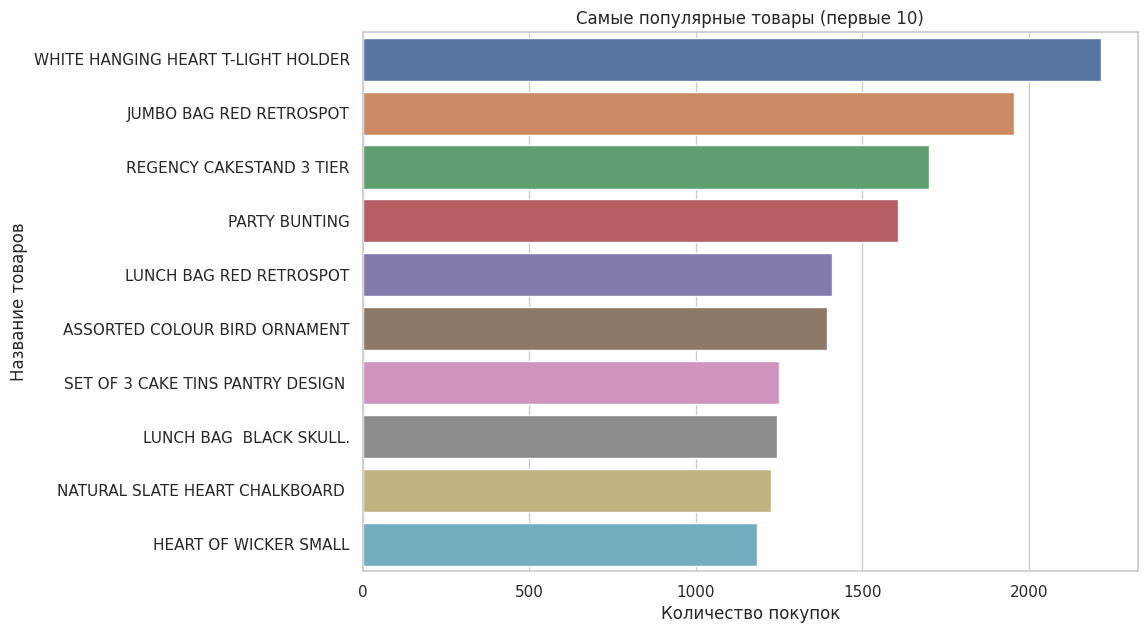

In [ ]:
# СМОТРИМ ПОПУЛЯРНЫЕ ТОВАРЫ ПО СТРАНЕ

# создаем новый датасет только с UK
df_with_uk = df.drop(df.loc[df['Country'] != 'United Kingdom'].index)

# группируем товары и считаем количество продаж
df_description_with_uk = df_with_uk.groupby('Description')['Quantity'].count().sort_values(ascending = False).reset_index()
df_description_with_uk = df_description_with_uk.head(10)

# строим график
sns.barplot(x = df_description_with_uk['Quantity'], y = df_description_with_uk['Description']);

# прописываем название графика и подписи осей
plt.title('Самые популярные товары (первые 10)')
plt.xlabel('Количество покупок')
plt.ylabel('Название товаров')

#### Вывод к графику Самые популярные товары (первые 10):

Из данного графика можно выделить самый популярный товар это **white hanging heart t-light holder**

### **ТОПЫ**

#### ТОП-5 ТОВАРОВ ПО КОЛИЧЕСТВУ ПРОДАЖ

In [ ]:
df_t = df.groupby('Description')['Quantity'].count().sort_values(ascending = False).reset_index()
df_top_product = df_t.head(5)
df_top_product.index.name = 'ТОП'

df_top_product

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description,Quantity
ТОП,,
0,WHITE HANGING HEART T-LIGHT HOLDER,2311
1,JUMBO BAG RED RETROSPOT,2109
2,REGENCY CAKESTAND 3 TIER,2007
3,PARTY BUNTING,1699
4,LUNCH BAG RED RETROSPOT,1581


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


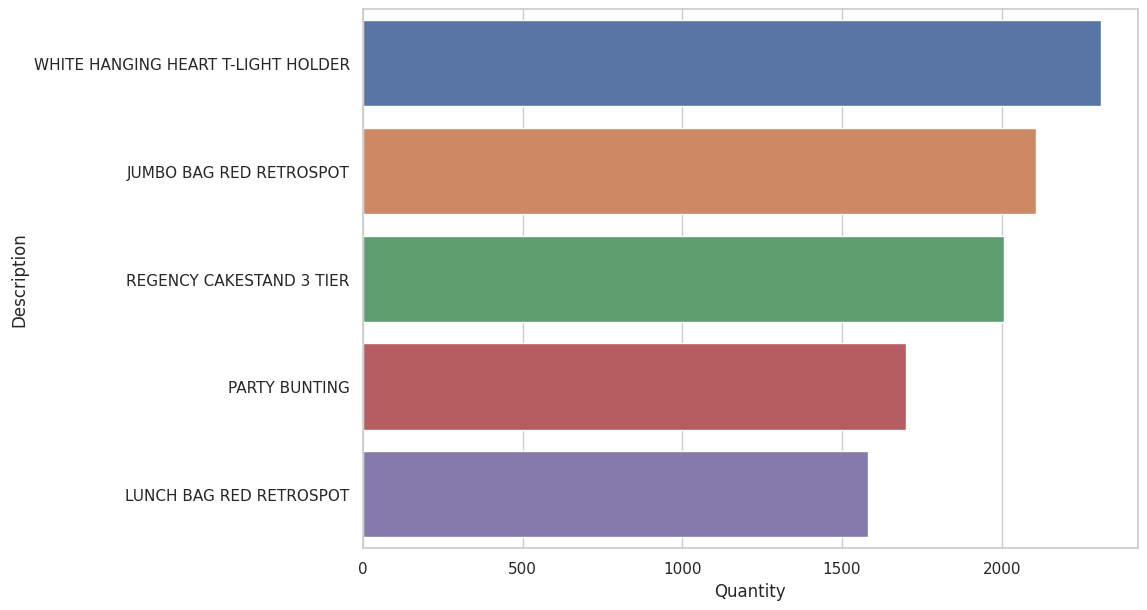

In [ ]:
sns.barplot(x = df_top_product['Quantity'], y = df_top_product['Description']);

#### ТОП-5 ПОКУПАТЕЛЕЙ ПО КОЛИЧЕСТВУ СОВЕРШЕННЫХ ПОКУПОК

In [ ]:
df_t = df.groupby('CustomerID')["Quantity"].count().sort_values(ascending = False).reset_index()
df_t = df_t.drop(df_t.loc[df_t['CustomerID'] == 'Unknown'].index)
df_top_customer = df_t.head(5)
df_top_customer.index.name = 'ТОП'
df_top_customer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Quantity
ТОП,,
1,17841.0,7676
2,14911.0,5670
3,14096.0,5111
4,12748.0,4412
5,14606.0,2677


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


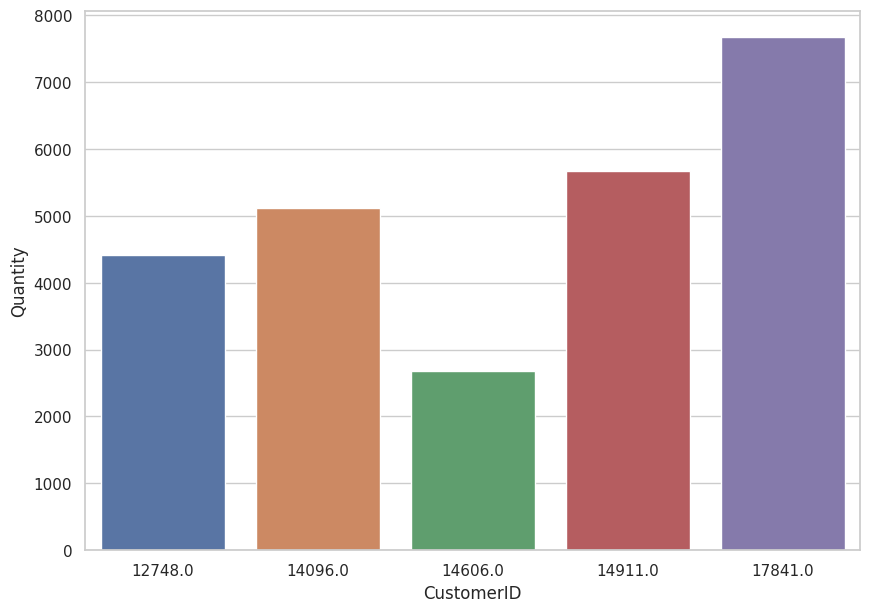

In [ ]:
sns.barplot(data = df_top_customer.sort_values('Quantity'), x = df_top_customer['CustomerID'], y = df_top_customer['Quantity']);

#### ТОП-5 ПОКУПАТЕЛЕЙ ПО СУММЕ ЧЕКА

In [ ]:
df_t = df.groupby('CustomerID')["SumSales"].sum().sort_values(ascending = False).reset_index()
df_t = df_t.drop(df_t.loc[df_t['CustomerID'] == 'Unknown'].index)
df_top_customer_sum = df_t.head(5)
df_top_customer_sum.index.name = 'ТОП'
df_top_customer_sum

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,SumSales
ТОП,,
1,14646.0,280206.02
2,18102.0,259657.30
3,17450.0,194390.79
4,16446.0,168472.50
5,14911.0,143711.17


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


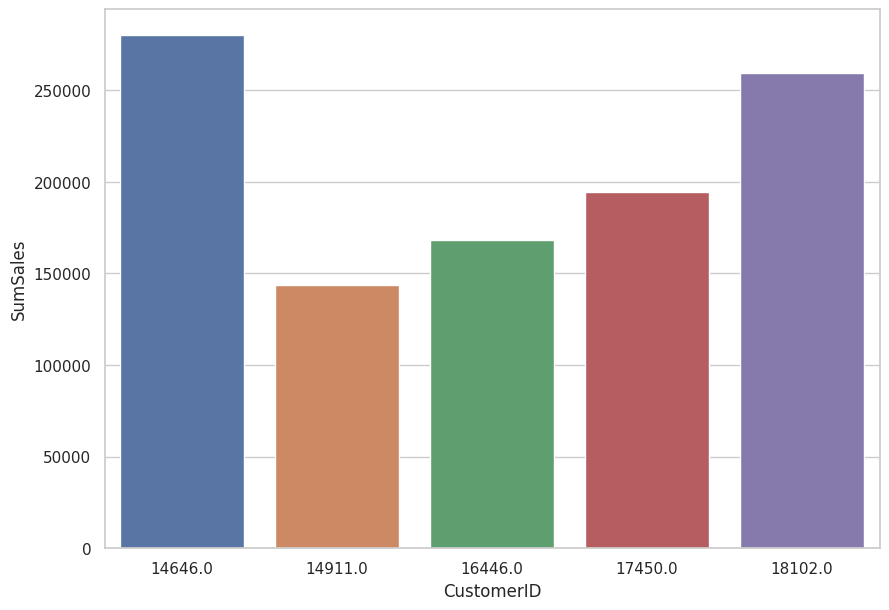

In [ ]:
sns.barplot(x = df_top_customer_sum['CustomerID'], y = df_top_customer_sum['SumSales']);

#### ТОП-5 ТОВАРОВ С НАИМЕНЬШИМ КОЛИЧЕСТВОМ ПРОДАЖ

In [ ]:
df_t = df.groupby('Description')["Quantity"].count().sort_values(ascending = True).reset_index()
df_top_product_min = df_t.head(5)
df_top_product_min.index.name = 'ТОП'
df_top_product_min

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description,Quantity
ТОП,,
0,BELL HEART ANTIQUE GOLD,1
1,"WALL ART , THE MAGIC FOREST",1
2,ANT SILVER TURQUOISE BOUDICCA RING,1
3,FILIGREE DIAMANTE CHAIN,1
4,GOLD COSMETICS BAG WITH BUTTERFLY,1


## **ПОСТРОЕНИЕ МОДЕЛИ**

### Подготавливаем датасет для обучения

In [ ]:
# создаем столбец с месяцем и годом
df['MonthYear'] = df['InvoiceDate'].dt.strftime('%Y-%m')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# группируем по году и месяцам и считаем сумму
df_ml = df.groupby(['MonthYear'])['SumSales'].sum().reset_index()
df_ml

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MonthYear,SumSales
0,2010-12,821452.730
1,2011-01,689811.610
2,2011-02,522545.560
3,2011-03,716215.260
4,2011-04,536968.491
5,2011-05,769296.610
6,2011-06,760547.010
7,2011-07,718076.121
8,2011-08,757841.380
9,2011-09,1056435.192


In [ ]:
# удаляем декабрь 2011, т.к. это не полный месяц, далее будем предсказывать значение этого месяца
df_ml.drop(index = df_ml.index [12], axis = 0 , inplace = True )
df_ml

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MonthYear,SumSales
0,2010-12,821452.730
1,2011-01,689811.610
2,2011-02,522545.560
3,2011-03,716215.260
4,2011-04,536968.491
5,2011-05,769296.610
6,2011-06,760547.010
7,2011-07,718076.121
8,2011-08,757841.380
9,2011-09,1056435.192


In [ ]:
# разделяем столбец 'MonthYear' на две части по символу "-"
df_ml[['Year', 'Month']] = df_ml['MonthYear'].str.split('-', expand=True)

# преобразуем столбцы 'Year' и 'Month' к числовому типу
df_ml['Year'] = pd.to_numeric(df_ml['Year'])
df_ml['Month'] = pd.to_numeric(df_ml['Month'])

df_ml

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MonthYear,SumSales,Year,Month
0,2010-12,821452.730,2010,12
1,2011-01,689811.610,2011,1
2,2011-02,522545.560,2011,2
3,2011-03,716215.260,2011,3
4,2011-04,536968.491,2011,4
5,2011-05,769296.610,2011,5
6,2011-06,760547.010,2011,6
7,2011-07,718076.121,2011,7
8,2011-08,757841.380,2011,8
9,2011-09,1056435.192,2011,9


### Формируем признаки и целевую переменную

In [ ]:
X = df_ml[['Year','Month']]
y = df_ml['SumSales']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Month
0,2010,12
1,2011,1
2,2011,2
3,2011,3
4,2011,4
5,2011,5
6,2011,6
7,2011,7
8,2011,8
9,2011,9


In [ ]:
y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      821452.730
1      689811.610
2      522545.560
3      716215.260
4      536968.491
5      769296.610
6      760547.010
7      718076.121
8      757841.380
9     1056435.192
10    1151263.730
11    1503866.780
Name: SumSales, dtype: float64

### Разделяем данные на выборку для обучения/проверки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train

,Year,Month
2,2011,2
8,2011,8
6,2011,6
10,2011,10
7,2011,7
0,2010,12
1,2011,1
4,2011,4
9,2011,9
3,2011,3


In [ ]:
y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2      522545.560
8      757841.380
6      760547.010
10    1151263.730
7      718076.121
0      821452.730
1      689811.610
4      536968.491
9     1056435.192
3      716215.260
Name: SumSales, dtype: float64

### Создаем и обучаем модель линейной регресии

In [ ]:
# Создаем и обучаем модель на тренировочных данных
lr = LinearRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


LinearRegression()

In [ ]:
# Получаем предсказание
lr.predict(X_test)

array([ 738574.14418244, 1053618.61181223])

### Оцениваем качество модели

In [ ]:
# Оцениваем качество для тренировочной выборки
MSE_train = mean_squared_error(y_train, lr.predict(X_train))
RMSE_train = math.sqrt(MSE_train)
RMSE_train

113342.85812409992

In [ ]:
# Оцениваем качество для тестовой выборки
MSE_test = mean_squared_error(y_test, lr.predict(X_test))
RMSE_test = math.sqrt(MSE_test)
RMSE_test

319113.83773063635

### Делаем предсказание для следующих 4 месяцев

In [ ]:
# Заполняем данные
data = [{"Year": 2011,"Month": 12},
        {"Year": 2012,"Month": 1},
        {"Year": 2012,"Month": 2},
        {"Year": 2012,"Month": 3}]

In [ ]:
df_YearMonth = pd.DataFrame(data)
df_YearMonth.head()

,Year,Month
0,2011,12
1,2012,1
2,2012,2
3,2012,3


In [ ]:
# Получаем предсказание на следующий 2012 год
lr_pred = lr.predict(df_YearMonth)
lr_pred

array([1106126.02308381,  813217.7921797 ,  865725.2034514 ,
        918232.61472297])

### Визуализируем предсказания

In [ ]:
# для наглядности склеим предсказанные значения к прогнозируемым месяцам
df_YearMonth.loc[:, 'SumSales'] = lr_pred
pd.set_option('display.float_format', '{:.2f}'.format)
df_YearMonth

,Year,Month,SumSales
0,2011,12,1106126.02
1,2012,1,813217.79
2,2012,2,865725.20
3,2012,3,918232.61


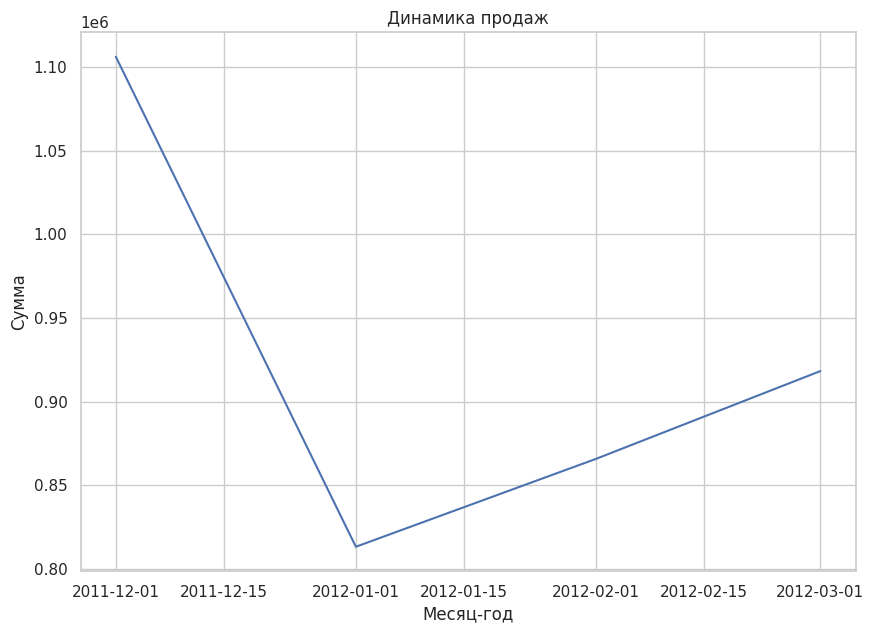

In [ ]:
# визуализируем только предсказания

# создаем новый столбец и склеиваем поля Year и Month
df_YearMonth['Date'] = pd.to_datetime(df_YearMonth[['Year', 'Month']].assign(DAY=1))

# группируем данные по месяцам и считаем сумму продаж
df_monthly = df_YearMonth.groupby(['Date']).sum()

# создаем график
plt.plot(df_monthly.index, df_monthly['SumSales'])

# подписываем оси и название графика
plt.title('Динамика продаж')
plt.xlabel('Месяц-год')
plt.ylabel('Сумма')

# стилизуем график
sns.set_style("whitegrid")
sns.set_context("notebook")

# отображаем график
plt.show()

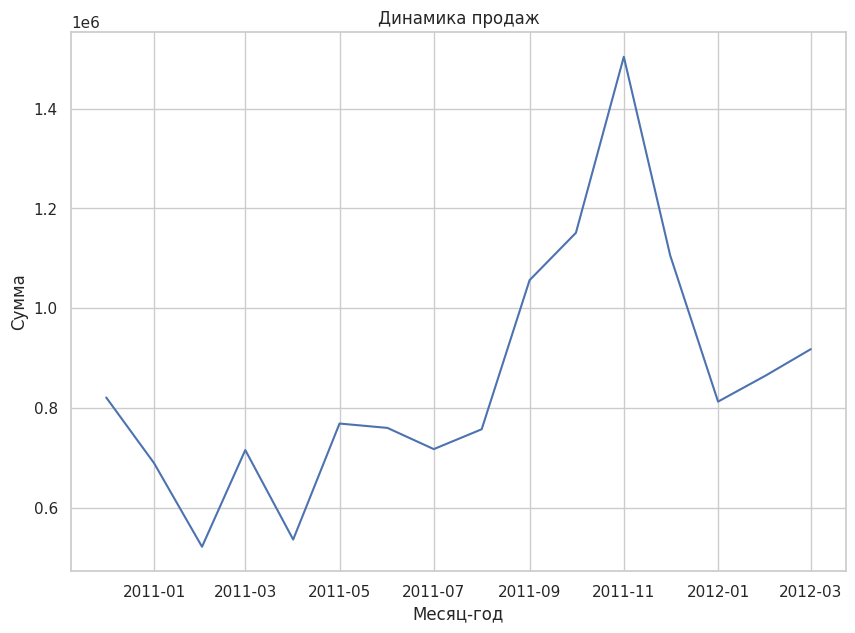

In [ ]:
# формируем исходный датасет с нужными полями
df_old = df_ml.loc[:, ["Year", "Month", "SumSales"]]
df_old['Date'] = pd.to_datetime(df_old[['Year', 'Month']].assign(DAY=1))
df_oldMonthly = df_old.groupby(['Date']).sum()

# склеиваем исходный датасет с датасетом предсказаний
df_all = pd.concat([df_oldMonthly, df_monthly])

# создаем график
plt.plot(df_all.index, df_all['SumSales'])

# подписываем оси и название графика
plt.title('Динамика продаж')
plt.xlabel('Месяц-год')
plt.ylabel('Сумма')

# стилизуем график
sns.set_style("whitegrid")
sns.set_context("notebook")

# отображаем график
plt.show()

#### Вывод:

Модель показывает нам, что произойдет небольшой спад продаж в декабре 2011 и еще больший в январе 2012 года, который будет постепенно расти, это видно уже по марту 2012 года.

## **ИТОГИ ПРОЕКТА И ЗАКЛЮЧЕНИЕ**



Сегодня рынок товаров, представленный в датасете, находится в нестабильном состоянии, он подвержен некоторым колебаниям, такими как, например, сезонность. В связи с этим, для руководителей и людей, принимающих решения, были предоставлены некоторые инсайты и рекомендации, которые должны помочь им в построении маркетинговой стратегии на будущие годы и улучшения своих показателей.


**РЕКОМЕНДАЦИИ**:

Проведенный анализ показал, что имеющихся данных недостаточно для получения четких выводов. Для улучшения качества данных необходимо доработать отчет, добавив новые колонки с нужной информацией:

1. **Наименование поставщика:**<br>
Это поможет компании найти более выгодные цены при закупке товарных запасов, определить Топовых поставщиков и снизить риски возврата бракованных партий.

2. **Наименование логистической компании:** <br>
Это поможет компании найти более выгодные цены при доставке товара потребителю.

3. **Маркетинговые затраты:**<br>
Это поможет выдвигать и проверять гипотезы относительно реального роста продаж, определяя, является ли рост популярности товаров причиной роста продаж, или же это результат значительных затрат на маркетинг. Кроме того, это позволит оценить и скорректировать маркетинговый бюджет.
